In [75]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
import os

batch_size = 32
num_classes = 10
epochs = 10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train,num_classes) #keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)   #keras.utils.to_categorical(y_test,num_classes)

model = keras.Sequential()

model.add(Conv2D(32, (3,3), padding='same',
             input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)#keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer=opt,
             metrics = ['accuracy'])
#print(model.summary())

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [76]:
history = model.fit(x_train,y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)

model.save("C:/Users/gabri/Curso_Visao_Computacional/cifar_simple_cnn_1.h5")

scores = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

Epoch 1/10
1563/1563 [==============================] - 151s 94ms/step - loss: 1.5164 - accuracy: 0.4508 - val_loss: 1.2731 - val_accuracy: 0.5446
Epoch 2/10
1563/1563 [==============================] - 157s 101ms/step - loss: 1.1269 - accuracy: 0.6055 - val_loss: 0.9971 - val_accuracy: 0.6488
Epoch 3/10
1563/1563 [==============================] - 153s 98ms/step - loss: 1.0086 - accuracy: 0.6542 - val_loss: 1.0445 - val_accuracy: 0.6528
Epoch 4/10
1563/1563 [==============================] - 154s 98ms/step - loss: 0.9688 - accuracy: 0.6717 - val_loss: 1.0726 - val_accuracy: 0.6557
Epoch 5/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.9615 - accuracy: 0.6781 - val_loss: 0.8216 - val_accuracy: 0.7197
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.9628 - accuracy: 0.6804 - val_loss: 0.9512 - val_accuracy: 0.6886
Epoch 7/10
1563/1563 [==============================] - 149s 96ms/step - loss: 0.9884 - accuracy: 0.6773 - val_loss

Automóvel


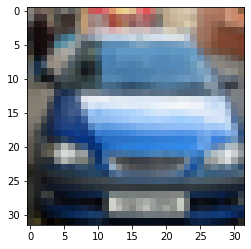

In [74]:
classifier = load_model('C:/Users/gabri/Curso_Visao_Computacional/cifar_simple_cnn_1.h5')
resp = classifier.predict_classes(x_test,verbose=0)

Caminhão
Test loss: 1.1584631204605103
Test accuracy: 0.6358000040054321


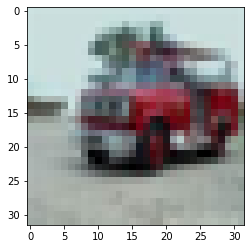

In [82]:
import matplotlib.pyplot as plt
import numpy as np
random_num = np.random.randint(0,len(x_test))
plt.imshow(x_test[random_num])

if resp[random_num] == 0: print("Avião")
if resp[random_num] == 1: print("Automóvel")
if resp[random_num] == 2: print("Pássaro")
if resp[random_num] == 3: print("Gato")
if resp[random_num] == 4: print("Cervo")
if resp[random_num] == 5: print("Cão")
if resp[random_num] == 6: print("Rã")
if resp[random_num] == 7: print("Cavalo")
if resp[random_num] == 8: print("Navio")
if resp[random_num] == 9: print("Caminhão")

print('Test loss:',scores[0])
print('Test accuracy:',scores[1])